# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [8]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
import json
import pandas as pd
%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/larawang/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [9]:
# Read your api key environment variable
from newsapi import NewsApiClient
api_key = os.getenv("NEWSAPI_KEY")
api_key = '463397fe159a430696ab537e805d3726'

In [10]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [37]:
# Fetch the Bitcoin news articles
btc_news=newsapi.get_everything(q='bitcoin',
                                language="en",
                                page_size=100,
                                sort_by="relevancy"
                                    )
btc_news

{'status': 'ok',
 'totalResults': 8186,
 'articles': [{'source': {'id': 'wired', 'name': 'Wired'},
   'author': 'Khari Johnson',
   'title': 'Why Not Use Self-Driving Cars as Supercomputers?',
   'description': 'Autonomous vehicles use the equivalent of 200 laptops to get around. Some want to tap that computing power to decode viruses or mine bitcoin.',
   'url': 'https://www.wired.com/story/use-self-driving-cars-supercomputers/',
   'urlToImage': 'https://media.wired.com/photos/60f081b4c147fe7a1a367362/191:100/w_1280,c_limit/Business-Autonomous-Vehicles-Supercomputers-1201885684.jpg',
   'publishedAt': '2021-07-19T11:00:00Z',
   'content': 'Like Dogecoin devotees, the mayor of Reno, and the leaders of El Salvador, Aldo Baoicchi is convinced cryptocurrency is the future. The CEO and founder of Canadian scooter maker Daymak believes this … [+4116 chars]'},
  {'source': {'id': 'the-verge', 'name': 'The Verge'},
   'author': 'Richard Lawler',
   'title': 'Kaseya ransomware attackers deman

In [38]:
# Fetch the Ethereum news articles
eth_news=newsapi.get_everything(q='ethereum',
                                language="en",
                                page_size=100,
                                sort_by="relevancy"
                                      )
eth_news

{'status': 'ok',
 'totalResults': 2384,
 'articles': [{'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
   'author': 'Connie Loizos',
   'title': 'Crypto investors like Terraform Labs so much, they’re committing $150 million to its ‘ecosystem’',
   'description': 'There are many blockchain platforms competing for investors’ and developers’ attention right now, from the big daddy of them all, Ethereum, to so-called “Ethereum Killers” like Solana, which we wrote about in May. Often, these technologies are seen as so prom…',
   'url': 'http://techcrunch.com/2021/07/16/crypto-investors-like-terraform-labs-so-much-theyre-committing-150-million-to-its-ecosystem/',
   'urlToImage': 'https://techcrunch.com/wp-content/uploads/2020/06/GettyImages-1174590894.jpg?w=667',
   'publishedAt': '2021-07-16T16:00:55Z',
   'content': 'There are many blockchain platforms competing for investors’ and developers’ attention right now, from the big daddy of them all, Ethereum, to so-called “Ethereum Kille

In [39]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in btc_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass

In [40]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in eth_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    

In [41]:
# Describe the Bitcoin Sentiment
btc_df = pd.DataFrame(bitcoin_sentiments)
btc_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.018600,0.042580,0.035780,0.921630
std,0.364209,0.058622,0.058825,0.078722
min,-0.827100,0.000000,0.000000,0.653000
25%,-0.121500,0.000000,0.000000,0.869500
50%,0.000000,0.000000,0.000000,0.925500
75%,0.278900,0.076750,0.070000,1.000000
max,0.865800,0.276000,0.287000,1.000000


In [42]:
# Describe the Ethereum Sentiment
eth_df = pd.DataFrame(ethereum_sentiments)
eth_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.00000
mean,0.141494,0.052730,0.022040,0.92524
std,0.340736,0.059483,0.043149,0.06995
min,-0.812600,0.000000,0.000000,0.71400
25%,0.000000,0.000000,0.000000,0.86875
50%,0.000000,0.039000,0.000000,0.92650
75%,0.411525,0.094000,0.041250,1.00000
max,0.778300,0.194000,0.249000,1.00000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum had the highest positive mean score which is around 0.053 slightly higher than bitcoin.

Q: Which coin had the highest compound score?

A: Bitcoin had the highest maximum of 0.866 compound score however ethereum had a higher mean compound score.

Q. Which coin had the highest positive score?

A: Bitcoin had the highest positive score.

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [43]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
from nltk.stem import WordNetLemmatizer


In [114]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = stopwords.words("english")

# Expand the default stopwords list if necessary
sw[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [115]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    tokens = word_tokenize(text)
    tokens = [w.lower() for w in tokens]
    
    import string
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]    
    words = [w for w in stripped if not w in stop_words]  
    misk_words=[""," "]
    words = [w for w in words if not w in misk_words] 
    porter = PorterStemmer()
    stemmed = [porter.stem(word) for word in words]    
    lemma = WordNetLemmatizer()
    lem_words = [lemma.lemmatize(word) for word in stemmed]
    
    return lem_words
   

In [116]:
# Create a new tokens column for Bitcoin
token_list_bitcoin=[]
for row in range(len(btc_df)):
    token_list_bitcoin.append(tokenizer(btc_df.iloc[row]['text']))
    
btc_df['token'] = token_list_bitcoin
btc_df

,text,date,compound,positive,negative,neutral,token
0,"Like Dogecoin devotees, the mayor of Reno, and...",2021-07-19,0.6908,0.178,0.000,0.822,"[like, dogecoin, devote, mayor, reno, leader, ..."
1,Filed under:\r\nThe supply chain attack has re...,2021-07-05,-0.5719,0.111,0.184,0.705,"[file, suppli, chain, attack, reach, thousand,..."
2,image copyrightGetty Images\r\nThe gang behind...,2021-07-05,-0.6124,0.000,0.143,0.857,"[imag, copyrightgetti, imag, gang, behind, col..."
3,While retail investors grew more comfortable b...,2021-07-14,0.7264,0.164,0.000,0.836,"[retail, investor, grew, comfort, buy, cryptoc..."
4,"As longtime TechCrunch readers know well, Mich...",2021-07-21,0.2732,0.097,0.000,0.903,"[longtim, techcrunch, reader, know, well, mich..."
...,...,...,...,...,...,...,...
95,Greenidge is allowed to take in 139 million ga...,2021-07-06,0.0000,0.000,0.000,1.000,"[greenidg, allow, take, 139, million, gallon, ..."
96,Gary Gensler is working on Biden's financial r...,2021-07-04,0.2732,0.076,0.044,0.880,"[gari, gensler, work, biden, financi, regulato..."
97,"As the crypto payments\r\n market gains steam,...",2021-07-14,0.8658,0.276,0.000,0.724,"[crypto, payment, market, gain, steam, lawmak,..."
98,Lots of computing power is used on bitcoin min...,2021-07-08,0.5574,0.101,0.000,0.899,"[lot, comput, power, use, bitcoin, mine, lar, ..."


In [117]:
# Create a new tokens column for Ethereum
token_list_etherium=[]
for row in range(len(eth_df)):
    token_list_etherium.append(tokenizer(eth_df.iloc[row]['text']))
    
eth_df['token'] = token_list_etherium
eth_df

,text,date,compound,positive,negative,neutral,token
0,There are many blockchain platforms competing ...,2021-07-16,0.3612,0.075,0.000,0.925,"[mani, blockchain, platform, compet, investor,..."
1,While retail investors grew more comfortable b...,2021-07-14,0.7264,0.164,0.000,0.836,"[retail, investor, grew, comfort, buy, cryptoc..."
2,Bitcoin and Ethereum\r\nYuriko Nakao\r\nEther ...,2021-07-02,0.3612,0.110,0.041,0.849,"[bitcoin, ethereum, yuriko, nakao, ether, over..."
3,"""Anthony Di Iorio, a co-founder of the Ethereu...",2021-07-17,0.6369,0.157,0.000,0.843,"[anthoni, di, iorio, cofound, ethereum, networ..."
4,"Ether holders have ""staked"" more than $13 bill...",2021-07-05,0.7717,0.194,0.000,0.806,"[ether, holder, stake, 13, billion, worth, cry..."
...,...,...,...,...,...,...,...
95,"Representations of cryptocurrencies Bitcoin, E...",2021-07-16,0.0000,0.000,0.000,1.000,"[represent, cryptocurr, bitcoin, ethereum, dog..."
96,"Bitcoin extended gains past $32,000, continuin...",2021-07-21,0.5859,0.121,0.000,0.879,"[bitcoin, extend, gain, past, 32000, continu, ..."
97,What happened\r\nThe price of Ether(CRYPTO:ETH...,2021-07-06,0.0000,0.000,0.000,1.000,"[happen, price, ether, crypto, eth, token, nat..."
98,Bitcoin(CRYPTO:BTC) and Ethereum(CRYPTO:ETH) h...,2021-07-06,0.0000,0.000,0.000,1.000,"[bitcoin, crypto, btc, ethereum, crypto, eth, ..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [84]:
from collections import Counter
from nltk import ngrams

In [86]:
# Generate the Bitcoin N-grams where N=2
n=2
for row in range(len(btc_df)):
    sentence = btc_df.iloc[row]['text']
    bigram = ngrams(sentence.split(), n)    

    for grams in bigram:
        print(grams)

('Like', 'Dogecoin')
('Dogecoin', 'devotees,')
('devotees,', 'the')
('the', 'mayor')
('mayor', 'of')
('of', 'Reno,')
('Reno,', 'and')
('and', 'the')
('the', 'leaders')
('leaders', 'of')
('of', 'El')
('El', 'Salvador,')
('Salvador,', 'Aldo')
('Aldo', 'Baoicchi')
('Baoicchi', 'is')
('is', 'convinced')
('convinced', 'cryptocurrency')
('cryptocurrency', 'is')
('is', 'the')
('the', 'future.')
('future.', 'The')
('The', 'CEO')
('CEO', 'and')
('and', 'founder')
('founder', 'of')
('of', 'Canadian')
('Canadian', 'scooter')
('scooter', 'maker')
('maker', 'Daymak')
('Daymak', 'believes')
('believes', 'this')
('this', '…')
('…', '[+4116')
('[+4116', 'chars]')
('Filed', 'under:')
('under:', 'The')
('The', 'supply')
('supply', 'chain')
('chain', 'attack')
('attack', 'has')
('has', 'reached')
('reached', 'over')
('over', 'a')
('a', 'thousand')
('thousand', 'organizations.')
('organizations.', 'Illustration')
('Illustration', 'by')
('by', 'Alex')
('Alex', 'Castro')
('Castro', '/')
('/', 'The')
('The',

In [87]:
# Generate the Ethereum N-grams where N=2
n=2
for row in range(len(eth_df)):
    sentence = eth_df.iloc[row]['text']
    bigram = ngrams(sentence.split(), n)    

    for grams in bigram:
        print(grams)

('There', 'are')
('are', 'many')
('many', 'blockchain')
('blockchain', 'platforms')
('platforms', 'competing')
('competing', 'for')
('for', 'investors’')
('investors’', 'and')
('and', 'developers’')
('developers’', 'attention')
('attention', 'right')
('right', 'now,')
('now,', 'from')
('from', 'the')
('the', 'big')
('big', 'daddy')
('daddy', 'of')
('of', 'them')
('them', 'all,')
('all,', 'Ethereum,')
('Ethereum,', 'to')
('to', 'so-called')
('so-called', '“Ethereum')
('“Ethereum', 'Killers”')
('Killers”', 'like')
('like', 'Solana,')
('Solana,', 'which')
('which', 'we')
('we', 'wrote…')
('wrote…', '[+2563')
('[+2563', 'chars]')
('While', 'retail')
('retail', 'investors')
('investors', 'grew')
('grew', 'more')
('more', 'comfortable')
('comfortable', 'buying')
('buying', 'cryptocurrencies')
('cryptocurrencies', 'like')
('like', 'Bitcoin')
('Bitcoin', 'and')
('and', 'Ethereum')
('Ethereum', 'in')
('in', '2021,')
('2021,', 'the')
('the', 'decentralized')
('decentralized', 'application')
('ap

In [88]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [89]:
# Use token_count to get the top 10 words for Bitcoin
all_tokens_bc = []
for row in range(len(btc_df)):
    all_tokens_bc += btc_df.iloc[row]['token']
top10bc=token_count(all_tokens_bc,10)
top10bc

[('char', 97),
 ('bitcoin', 93),
 ('reuter', 64),
 ('june', 47),
 ('cryptocurr', 41),
 ('illustr', 23),
 ('2021', 22),
 ('seen', 21),
 ('taken', 21),
 ('represent', 20)]

In [90]:
# Use token_count to get the top 10 words for Ethereum
all_tokens_eth = []
for row in range(len(eth_df)):
    all_tokens_eth += eth_df.iloc[row]['token']
top10eth=token_count(all_tokens_eth,10)
top10eth

[('char', 99),
 ('bitcoin', 47),
 ('cryptocurr', 46),
 ('ethereum', 33),
 ('june', 33),
 ('reuter', 30),
 ('2021', 26),
 ('represent', 24),
 ('illustr', 21),
 ('…', 20)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [92]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

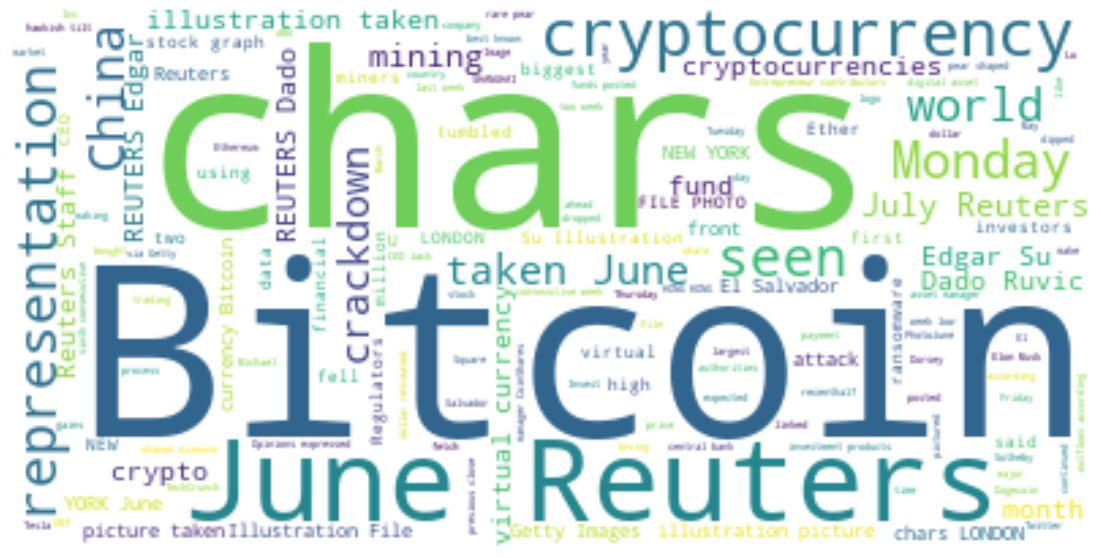

In [93]:
# Generate the Bitcoin word cloud
text = " ".join(review for review in btc_df.text)
wordcloud = WordCloud(stopwords=stop_words, background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

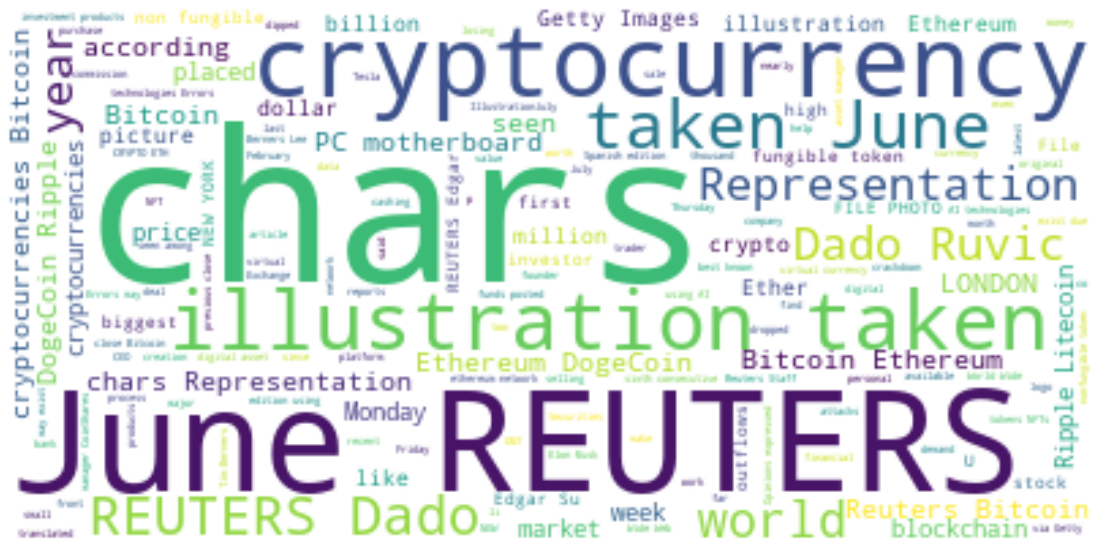

In [94]:
# Generate the Ethereum word cloud
text = " ".join(review for review in eth_df.text)
wordcloud = WordCloud(stopwords=stop_words, background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [96]:
import spacy
from spacy import displacy

In [97]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [98]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [100]:
# Concatenate all of the Bitcoin text together
text = " ".join(review for review in btc_df.text)

In [103]:
# Run the NER processor on all of the text
from spacy import displacy

doc = nlp(text)
nlp = spacy.load("en_core_web_sm")

# Add a title to the document
doc.user_data["title"] = "Bitcoin NER"

In [104]:
# Render the visualization
displacy.render(doc, style='ent')

In [105]:
# List all Entities
print([ent.text for ent in doc.ents])

['Reno', 'El Salvador', 'Aldo Baoicchi', 'Canadian', 'Daymak', 'Alex Castro', 'The Verge', 'Three days', 'the holiday weekend', 'copyrightGetty Images', '$70m', '£50.5m', 'Bitcoin and Ethereum', '2021', 'Michael Arrington', 'TechCrunch', 'Crunchbase', 'CrunchFund', 'Tuesday', '2017', 'LONDON', 'June 23', 'Reuters', 'El Salvador', 'LONDON', 'June 23', 'Reuters', 'El Salvador', 'Pr', 'earlier this year', 'March 15, 2021', 'REUTERS', 'Dado Ruvic/', 'June 30', 'Reuters', 'June 21', 'Reuters', 'Monday', 'China', 'Sichuan', 'as low as $32,288', 'first', 'June 14, 2021', 'REUTERS', 'Edgar Su/IllustrationJune 25', 'Reuters', '7.37%', '32,094.44', 'Monday', 'China', 'June 21', 'Reuters', '8.57%', '32,540.35', '2011', 'Monday', '3,049.42', '49.9%', 'Reuters', 'June 21', 'Reuters', '8.57%', '32,540.35', '2011', 'Monday', '3,049.42', 'Reuters', 'FILE', 'June 7, 2021', 'REUTERS', 'Edgar Su/Illustration/File Photo', 'Reuters', '+304', 'James Martin/CNET', 'UK', 'Spain', 'Twitter', '2020', 'the US De

---

### Ethereum NER

In [108]:
# Concatenate all of the Ethereum text together
text = " ".join(review for review in eth_df.text)

In [109]:
# Run the NER processor on all of the text
from spacy import displacy

doc = nlp(text)
nlp = spacy.load("en_core_web_sm")
# Add a title to the document
doc.user_data["title"] = "Ethereum NER"

In [110]:
# Render the visualization
displacy.render(doc, style='ent')

In [111]:
# List all Entities
print([ent.text for ent in doc.ents])

['Ethereum', 'Ethereum Killers', 'Solana', 'Bitcoin and Ethereum', '2021', 'Yuriko Nakao', 'Friday', 'Anthony Di Iorio', 'Ethereum', 'Bloomberg', 'Slashdot', 'more than $13 billion', '2.0', 'Photothek', 'more than $13 billion', '2.0', '$40 billion', '2025', 'JPMorgan', 'NFT', '90 percent', 'recent weeks', 'recent months', 'American Express', 'Spanish', 'AI', 'The Securities and Exchange Commission', 'Reuters', 'June 25', 'Reuters', '7.37%', '32,094.44', 'Friday', '2,554.88', '50.5', 'London', 'Ethereum', '12 965 000', 'August 3-5, 2021', 'Clie', 'Getty Images\r\nInvestors', 'the third week', 'February 2018', 'Reuters', 'June 25', 'Reuters', '8.51%', '31,699.83', '22:04 GMT', 'Friday', '2,937.27', 'June 21', 'Reuters', '8.57%', '32,540.35', '2011', 'Monday', '3,049.42', '49.9%', 'Reuters', 'June 21', 'Reuters', '8.57%', '32,540.35', '2011', 'Monday', '3,049.42', 'Reuters', 'FILE', 'June 7, 2021', 'REUTERS', 'Edgar Su/Illustration/File Photo', 'Reuters', '+304', 'Hackaday', 'Proof of Wor

---